<a href="https://colab.research.google.com/github/zakynine/machine-learning/blob/main/ML_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhamad Zaki Anbari

zakynineth@gmail.com

This Machine Learning created to find right news category based on news title

In [ ]:
#deklarasi library yang diperlukan
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#mount drive untuk load dataset
drive.mount('/content/drive')

#load dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/indonesian-news-title.csv'
df = pd.read_csv(dataset_path)

#cek jumlah sample
df.tail()

Mounted at /content/drive


,date,url,title,category
91012,02/03/2020,https://travel.detik.com/travel-news/d-4882807...,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel
91013,02/03/2020,https://travel.detik.com/fototravel/d-4882796/...,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel
91014,02/03/2020,https://travel.detik.com/travel-news/d-4882794...,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel
91015,02/03/2020,https://travel.detik.com/travel-news/d-4882792...,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel
91016,02/03/2020,https://travel.detik.com/travel-news/d-4882791...,"Kapal Raib di Segitiga Bermuda, Nyaris Seabad ...",travel


In [ ]:
df = df.drop(columns=['date', 'url'])
df.head()

,title,category
0,Kemnaker Awasi TKA di Meikarta,finance
1,BNI Digitalkan BNI Java Jazz 2020,finance
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


In [ ]:
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis =1)
df_new = df_new.drop(columns='category')
df_new

,title,finance,food,health,hot,inet,news,oto,sport,travel
0,Kemnaker Awasi TKA di Meikarta,1,0,0,0,0,0,0,0,0
1,BNI Digitalkan BNI Java Jazz 2020,1,0,0,0,0,0,0,0,0
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",1,0,0,0,0,0,0,0,0
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,1,0,0,0,0,0,0,0,0
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
91012,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",0,0,0,0,0,0,0,0,1
91013,Foto: Bali & 9 Destinasi Paling Instagramable ...,0,0,0,0,0,0,0,0,1
91014,Game Bikin Turis Ini Liburan ke Jepang untuk.....,0,0,0,0,0,0,0,0,1
91015,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",0,0,0,0,0,0,0,0,1


In [ ]:
judul_berita = df_new['title'].values
label = df_new[['finance', 'food', 'health', 'hot', 'inet', 'news', 'oto', 'sport', 'travel']]

In [ ]:
#split dataset
judul_berita_train, judul_berita_test, label_train, label_test = train_test_split(judul_berita, label, test_size=0.2)

In [ ]:
#tokenisasi data
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(judul_berita_train)
tokenizer.fit_on_texts(judul_berita_test)

sekuens_train = tokenizer.texts_to_sequences(judul_berita_train)
sekuens_test = tokenizer.texts_to_sequences(judul_berita_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [ ]:
 # menggunakan callbacks untuk atasi overfitting

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8):
       print("\n Akurasi > 80%, stop training!!!")
       self.model.stop_training=True

callbacks = myCallback()

In [ ]:
#menggunakan sekuensial, lstm, dan embedding
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')                                                  
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(padded_train,
                    label_train,
                    epochs=30,
                    validation_data=(padded_test, label_test),
                    verbose=2,
                    callbacks=[callbacks]
                    )

Epoch 1/30
2276/2276 - 32s - loss: 0.8438 - accuracy: 0.7181 - val_loss: 0.5627 - val_accuracy: 0.8132
Epoch 2/30
2276/2276 - 24s - loss: 0.4432 - accuracy: 0.8572 - val_loss: 0.4641 - val_accuracy: 0.8519

 Akurasi > 80%, stop training!!!


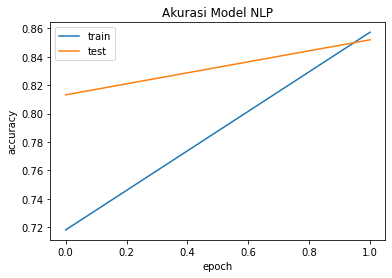

In [ ]:
#plotting akurasi model NLP
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model NLP')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

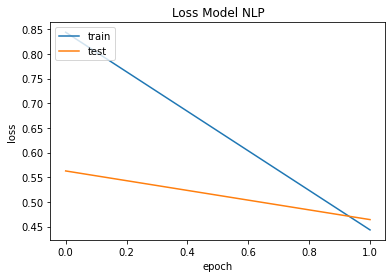

In [ ]:
#plotting loss model NLP
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model NLP')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()